# Model Evaluation

In [1]:
import IS_class as ip

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.dummy import DummyClassifier
from sklearn import cross_decomposition
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, make_scorer, confusion_matrix, roc_auc_score
import pyispace
from scipy.spatial import distance

import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import pickle as pkl

In [2]:
tsp60data = pd.read_csv('./Data/metaTSP60.csv',index_col=0)
tsp1800data = pd.read_csv('./Data/metaTSP1800.csv',index_col=0)
tspWdata = pd.read_csv('./Data/metaTSPwinner.csv',index_col=0)

knapsack = pd.read_csv('./Data/knapsack metadata.csv', index_col=0)
bestKP = pd.read_csv('./Data/knapsack_best.csv', index_col=0)

vrpData = pd.read_csv('./Data/setX meta_abs.csv', index_col=0)
bestVRP = pd.read_csv('./Data/setX best.csv', index_col=0)

## Class proportions

In [3]:
print(bestKP['Best'].value_counts(True))
print(bestVRP['Best'].value_counts(True))
print(tsp60data['CLASS'].value_counts(True))
print(tsp1800data['CLASS'].value_counts(True))
print(tspWdata['CLASS'].value_counts(True))

Best
Combo      0.6365
Minknap    0.2345
Expknap    0.1290
Name: proportion, dtype: float64
Best
HGS-CVRP    0.52
HGS-2012    0.20
SISR        0.13
FILO        0.10
HILS        0.05
Name: proportion, dtype: float64
CLASS
ANY     0.448437
LKH     0.352776
MAOS    0.198787
Name: proportion, dtype: float64
CLASS
LKH     0.481568
ANY     0.433504
MAOS    0.084928
Name: proportion, dtype: float64
CLASS
MAOS    0.369109
LKH     0.359309
ANY     0.271582
Name: proportion, dtype: float64


# Knapsack

In [4]:
kpO = pd.read_pickle('./Proj Results/knapsack/other.pkl')

kreg = kpO['reg rel']
krega = kpO['reg abs']

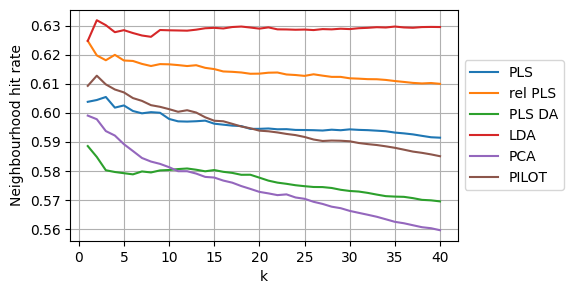

In [5]:
kpO['nh']['Actual'].plot(grid=True, xlabel='k', ylabel='Neighbourhood hit rate', 
                   #title='knapsack actual',
                   figsize=(5,3) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(f'./conf paper plots/kp nh actual.pdf', bbox_inches='tight')


In [6]:
kreg[1]['test'].describe([0.5,0.9,0.95,0.98])

,Naive,All,PCA,PILOT,LDA,PLS,rel PLS,PLS DA
count,291.000000,209.000000,209.000000,216.000000,219.000000,211.000000,222.000000,218.000000
mean,1.352916,643.034206,643.032080,999.136990,1.203934,636.944221,399.240358,989.930563
std,2.260965,5099.801607,5099.801876,6438.112854,2.059675,5075.842350,3900.135147,6409.092860
min,0.000339,0.000339,0.000339,0.000339,0.000339,0.000339,0.000339,0.000339
50%,0.465787,0.465787,0.465787,0.448608,0.386527,0.465787,0.519608,0.448608
90%,3.838012,4.362800,4.362800,5.374216,3.040452,4.344769,4.726903,4.873624
95%,4.585967,9.406992,9.406992,140.770947,4.819648,9.400049,10.264446,94.893957
98%,8.804630,3856.740495,3856.740495,12208.010063,7.319732,3808.039977,2717.568404,12040.900419
max,15.591678,55663.410403,55663.410403,56980.788620,15.283939,55663.410403,55663.410403,56980.788620


In [7]:
krega[1]['test'].describe([0.5,0.9,0.95,0.98])

,Naive,All,PCA,PILOT,LDA,PLS,rel PLS,PLS DA
count,2.910000e+02,2.090000e+02,2.090000e+02,2.160000e+02,2.190000e+02,2.110000e+02,2.220000e+02,2.180000e+02
mean,7.840459e-04,4.539138e-01,4.539222e-01,6.475893e-01,1.061888e-03,4.496197e-01,4.064815e-01,6.415822e-01
std,3.062016e-03,2.526794e+00,2.526792e+00,3.015757e+00,3.499103e-03,2.515118e+00,2.437255e+00,3.002480e+00
min,7.100000e-09,7.100000e-09,7.100000e-09,7.100000e-09,7.100000e-09,7.100000e-09,7.100000e-09,7.100000e-09
50%,1.343077e-05,2.284643e-05,2.304160e-05,2.749100e-05,1.890773e-05,2.284643e-05,2.561400e-05,2.561400e-05
90%,1.522616e-03,4.338970e-03,4.338970e-03,6.183750e-03,2.817554e-03,4.287040e-03,4.257924e-03,5.486652e-03
95%,4.141460e-03,1.688668e-02,1.688668e-02,2.396731e-02,5.997262e-03,1.668398e-02,1.166917e-02,2.283523e-02
98%,1.023674e-02,1.499462e+01,1.499462e+01,1.499807e+01,1.140195e-02,1.499459e+01,1.499447e+01,1.499803e+01
max,3.245794e-02,1.499973e+01,1.499973e+01,1.499974e+01,3.245794e-02,1.499973e+01,1.499973e+01,1.499974e+01


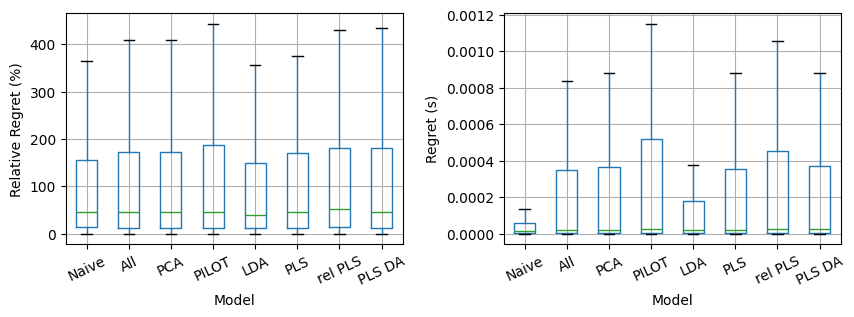

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

(kreg[1]['test']*100).boxplot(ax=ax[0],showfliers=False,
                        xlabel='Model', ylabel='Relative Regret (%)')
ax[0].tick_params(axis='x', labelrotation = 25)

krega[1]['test'].boxplot(ax=ax[1],showfliers=False,
                        xlabel='Model', ylabel='Regret (s)')

ax[1].tick_params(axis='x', labelrotation = 25)
plt.subplots_adjust(wspace=0.3, hspace=0.3)    
# plt.savefig('./conf paper plots/kp regret rel and abs.pdf', bbox_inches='tight')

# VRP

In [9]:
vO = pd.read_pickle('./Proj Results/vrp/other.pkl')
vreg = vO['reg rel']


In [11]:
(vreg[1]['test']*100).describe([0.5,0.9,0.95,0.98])

,All,PLS,rel PLS,PLS DA
count,7.000000,9.000000,6.000000,6.000000
mean,0.140491,0.101198,0.161452,0.043398
std,0.103137,0.100842,0.090577,0.063523
min,0.000000,0.000000,0.026506,0.000000
50%,0.126814,0.082921,0.188582,0.011027
90%,0.275584,0.190506,0.242808,0.119167
95%,0.282076,0.260691,0.254868,0.137291
98%,0.285971,0.302802,0.262104,0.148165
max,0.288567,0.330876,0.266928,0.155414


<Axes: xlabel='Model', ylabel='Relative Regret (%)'>

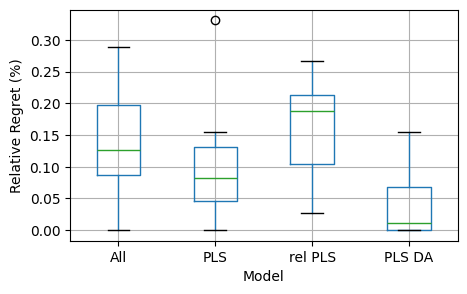

In [12]:
(vreg[1]['test']*100).boxplot(figsize=(5,3),
                        xlabel='Model', ylabel='Relative Regret (%)')
# plt.savefig('./conf paper plots/vrp regret.pdf', bbox_inches='tight')

# TSP

In [13]:
def tsp_regret(Ip, folder, cols):

    
    methods = ['Naive','All','PCA','PILOT','LDA','PLS','rel PLS','PLS DA']

    ind = {t: list(Ip.split_data[f'Yb_{t}'].index) for t in ['train','test']}

    preds = pd.read_pickle(f'{folder}/predictions.pkl')
    preds = {t: pd.DataFrame(
        {mod: preds[(mod,t_)] for (mod,t_) in preds.keys() if t_==t}, index=ind[t])
    for t in ['train','test']}
    
    Yr = {t: pd.DataFrame(Ip.split_data[f'Yr_{t}'], columns = cols, index = ind[t]) for t in ['train','test']}
    Yr['train']['ANY'] = Yr['train'].max(axis=1)
    Yr['test']['ANY'] = Yr['test'].max(axis=1)

    regrets = {t: 
        pd.DataFrame({mod:
            [Yr[t].loc[inst, preds[t].loc[inst,mod]] for inst in ind[t]]
        for mod in methods}, index=ind[t]) 
    for t in ['train','test']}

    regrets_sub = {t: 
        pd.DataFrame({mod:
            [Yr[t].loc[inst, preds[t].loc[inst,mod]]
             if preds[t].loc[inst,mod] != Ip.split_data[f'Yb_{t}'].loc[inst] else np.nan
              for inst in ind[t]]
        for mod in methods}, index=ind[t]) 
    for t in ['train','test']}

    return regrets, regrets_sub

In [14]:
tsp60 = pd.read_pickle('./Proj Results/tsp60/data.pkl')
tsp1800 = pd.read_pickle('./Proj Results/tsp1800/data.pkl')
tspWin = pd.read_pickle('./Proj Results/tspWin/data.pkl')

t60nh = pd.read_pickle('./Proj Results/tsp60/other.pkl')['nh']
t1800nh = pd.read_pickle('./Proj Results/tsp1800/other.pkl')['nh']
tWinnh = pd.read_pickle('./Proj Results/tspWin/other.pkl')['nh']

t60r = tsp_regret(tsp60,'./Proj Results/tsp60',['LKH','MAOS'])
t1800r = tsp_regret(tsp1800,'./Proj Results/tsp1800',['LKH','MAOS'])
tWinr = tsp_regret(tspWin,'./Proj Results/tspWin',['LKH','MAOS'])

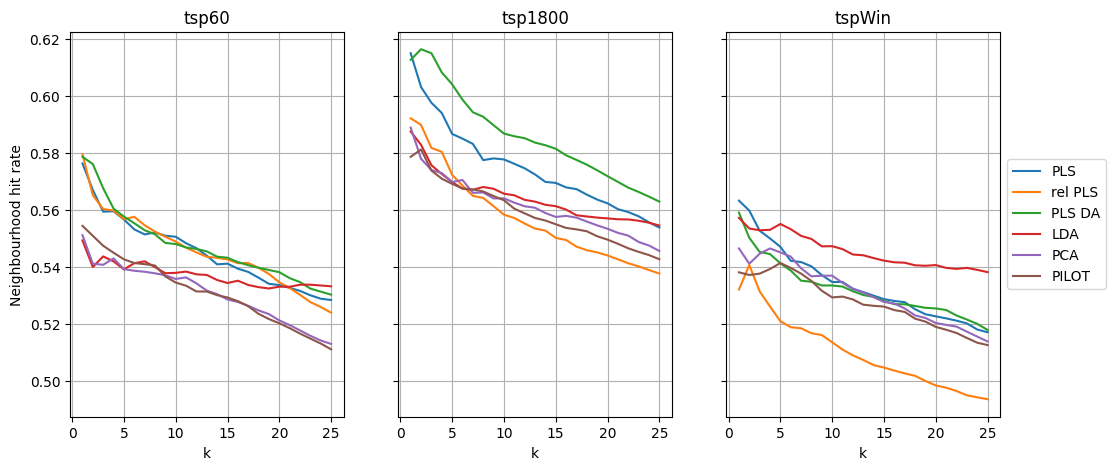

In [15]:
fig, ax = plt.subplots(1,3, figsize=(12,5), sharey=True)

t60nh['Actual'].plot(grid=True, xticks=range(0,26,5), ax=ax[0], 
            xlabel='k', ylabel='Neighbourhood hit rate', title='tsp60', legend=False)

t1800nh['Actual'].plot(grid=True, xticks=range(0,26,5), ax=ax[1],
            xlabel='k', ylabel='Neighbourhood hit rate', title='tsp1800', legend=False)

tWinnh['Actual'].plot(grid=True, xticks=range(0,26,5), ax=ax[2],
            xlabel='k', ylabel='Neighbourhood hit rate', title='tspWin')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#plt.subplots_adjust(wspace=0.3, hspace=0.3)
# plt.savefig(f'./conf paper plots/tsp nh actual.pdf', bbox_inches='tight')


<Axes: title={'center': 'tspWin'}, xlabel='Model'>

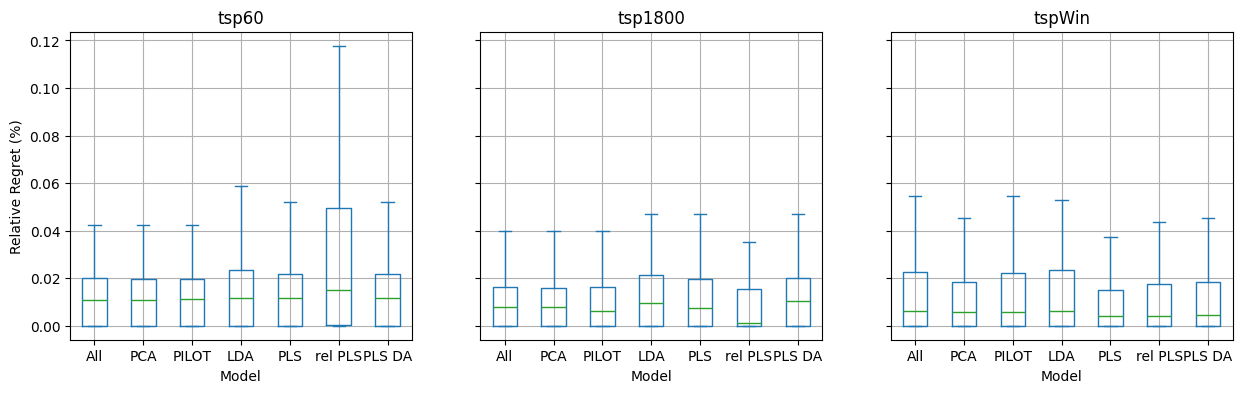

In [16]:
fig, ax = plt.subplots(1,3, figsize=(15,4), sharey=True)
(t60r[1]['test'].drop(columns='Naive')*100).plot.box(
            ax=ax[0], grid=True,showfliers=False, #figsize=(5,3),
            xlabel='Model', ylabel='Relative Regret (%)', title='tsp60')

(t1800r[1]['test'].drop(columns='Naive')*100).plot.box(
    ax=ax[1],showfliers=False,grid=True, #figsize=(5,3),
                        xlabel='Model', title='tsp1800')

(tWinr[1]['test'].drop(columns='Naive')*100).plot.box(
    ax=ax[2],showfliers=False,grid=True, #figsize=(5,3),
                        xlabel='Model', title='tspWin')

# plt.savefig('./conf paper plots/tsp regret.pdf', bbox_inches='tight')